In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

print("GPUs Available:", tf.config.list_physical_devices('GPU'))
BATCH_SIZE = 10000  # Process 10,000 rows at a time to avoid memory issues

GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [19]:
# Load the faulty dataset
print("🔄 Loading scaler...")
scaler = np.load("models/scaler.npy", allow_pickle=True).item()

print("📂 Loading trained model...")
model = keras.models.load_model("models/autoencoder.h5", custom_objects={"mse": keras.losses.MeanSquaredError()})

🔄 Loading scaler...
📂 Loading trained model...


/opt/homebrew/anaconda3/envs/tensorflow-gpu/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [20]:
# Read CSV in chunks to handle large files
print("🔄 Loading data in chunks...")
chunk_iterator = pd.read_csv("data/faulty_testing.csv", chunksize=BATCH_SIZE)

anomaly_results = []

🔄 Loading data in chunks...


In [21]:
for i, chunk in enumerate(chunk_iterator):
    print(f"🔍 Processing chunk {i+1}...")

    chunk = chunk.iloc[:, 1:]  # Drop index column if present
    scaled_chunk = scaler.transform(chunk)

    # Predict reconstruction error
    reconstructed = model.predict(scaled_chunk, verbose=0)
    mse = np.mean(np.power(scaled_chunk - reconstructed, 2), axis=1)

    # Set threshold dynamically (mean + 3*std of first batch)
    if i == 0:
        threshold = np.mean(mse) + 3 * np.std(mse)

    anomalies = mse > threshold
    chunk["Anomaly"] = anomalies
    anomaly_results.append(chunk)


🔍 Processing chunk 1...
🔍 Processing chunk 2...
🔍 Processing chunk 3...
🔍 Processing chunk 4...
🔍 Processing chunk 5...
🔍 Processing chunk 6...
🔍 Processing chunk 7...
🔍 Processing chunk 8...
🔍 Processing chunk 9...
🔍 Processing chunk 10...
🔍 Processing chunk 11...
🔍 Processing chunk 12...
🔍 Processing chunk 13...
🔍 Processing chunk 14...
🔍 Processing chunk 15...
🔍 Processing chunk 16...
🔍 Processing chunk 17...
🔍 Processing chunk 18...
🔍 Processing chunk 19...
🔍 Processing chunk 20...
🔍 Processing chunk 21...
🔍 Processing chunk 22...
🔍 Processing chunk 23...
🔍 Processing chunk 24...
🔍 Processing chunk 25...
🔍 Processing chunk 26...
🔍 Processing chunk 27...
🔍 Processing chunk 28...
🔍 Processing chunk 29...
🔍 Processing chunk 30...
🔍 Processing chunk 31...
🔍 Processing chunk 32...
🔍 Processing chunk 33...
🔍 Processing chunk 34...
🔍 Processing chunk 35...
🔍 Processing chunk 36...
🔍 Processing chunk 37...
🔍 Processing chunk 38...
🔍 Processing chunk 39...
🔍 Processing chunk 40...
🔍 Process

In [22]:
# ✅ Save results
print("📂 Saving detected anomalies...")
final_df = pd.concat(anomaly_results, ignore_index=True)
final_df.to_csv("data/TEP_Faulty_Training_Anomalies_dip.csv", index=False)


📂 Saving detected anomalies...


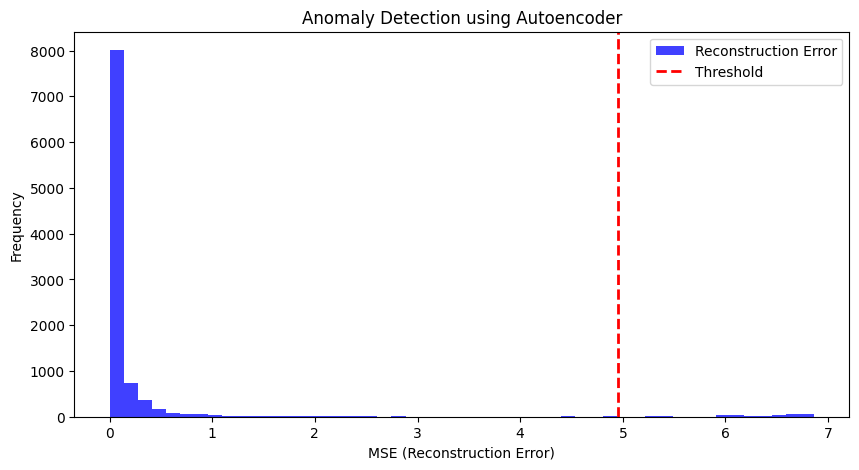

✅ Anomaly detection complete! Results saved.


In [24]:
# ✅ Plot anomaly distribution
plt.figure(figsize=(10, 5))
plt.hist(mse, bins=50, alpha=0.75, color="blue", label="Reconstruction Error")
plt.axvline(threshold, color="red", linestyle="dashed", linewidth=2, label="Threshold")
plt.xlabel("MSE (Reconstruction Error)")
plt.ylabel("Frequency")
plt.title("Anomaly Detection using Autoencoder")
plt.legend()
plt.show()

print("✅ Anomaly detection complete! Results saved.")